In [ ]:
import pandas as pd

In [ ]:
import numpy as np
from itertools import accumulate
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import  mean_squared_error


In [ ]:
!pip install skillsnetwork
import skillsnetwork
await skillsnetwork.prepare("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module1/L2/data/Bike-Sharing-Dataset.zip",overwrite=True)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.6 MB/s eta 0:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

Saved to '.'


In [ ]:
raw_dataset= pd.read_csv('day.csv')

In [ ]:
raw_dataset.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
434,435,2012-03-10,1,1,3,0,6,0,1,0.287500,0.277767,0.350417,0.225750,968,3150,4118
458,459,2012-04-03,2,1,4,0,2,1,1,0.466667,0.461483,0.396667,0.100133,1348,5424,6772
391,392,2012-01-27,1,1,1,0,5,1,2,0.425000,0.415383,0.741250,0.342667,269,3187,3456
713,714,2012-12-14,4,1,12,0,5,1,1,0.281667,0.294192,0.642917,0.131229,429,5182,5611
621,622,2012-09-13,3,1,9,0,4,1,1,0.612500,0.579558,0.637083,0.082721,1054,6750,7804


In [ ]:
raw_dataset.drop(columns=['dteday','instant','registered','casual'],axis=1,inplace=True)

In [ ]:
raw_dataset.sample(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
475,2,1,4,0,5,1,1,0.526667,0.515775,0.694583,0.149871,7290
255,3,0,9,0,2,1,1,0.650833,0.603554,0.712500,0.141804,4763
424,1,1,2,0,3,1,2,0.344348,0.348470,0.804783,0.179117,1834
684,4,1,11,0,4,1,2,0.321667,0.324492,0.620417,0.152987,5445
388,1,1,1,0,2,1,1,0.342500,0.349108,0.835833,0.123767,4339


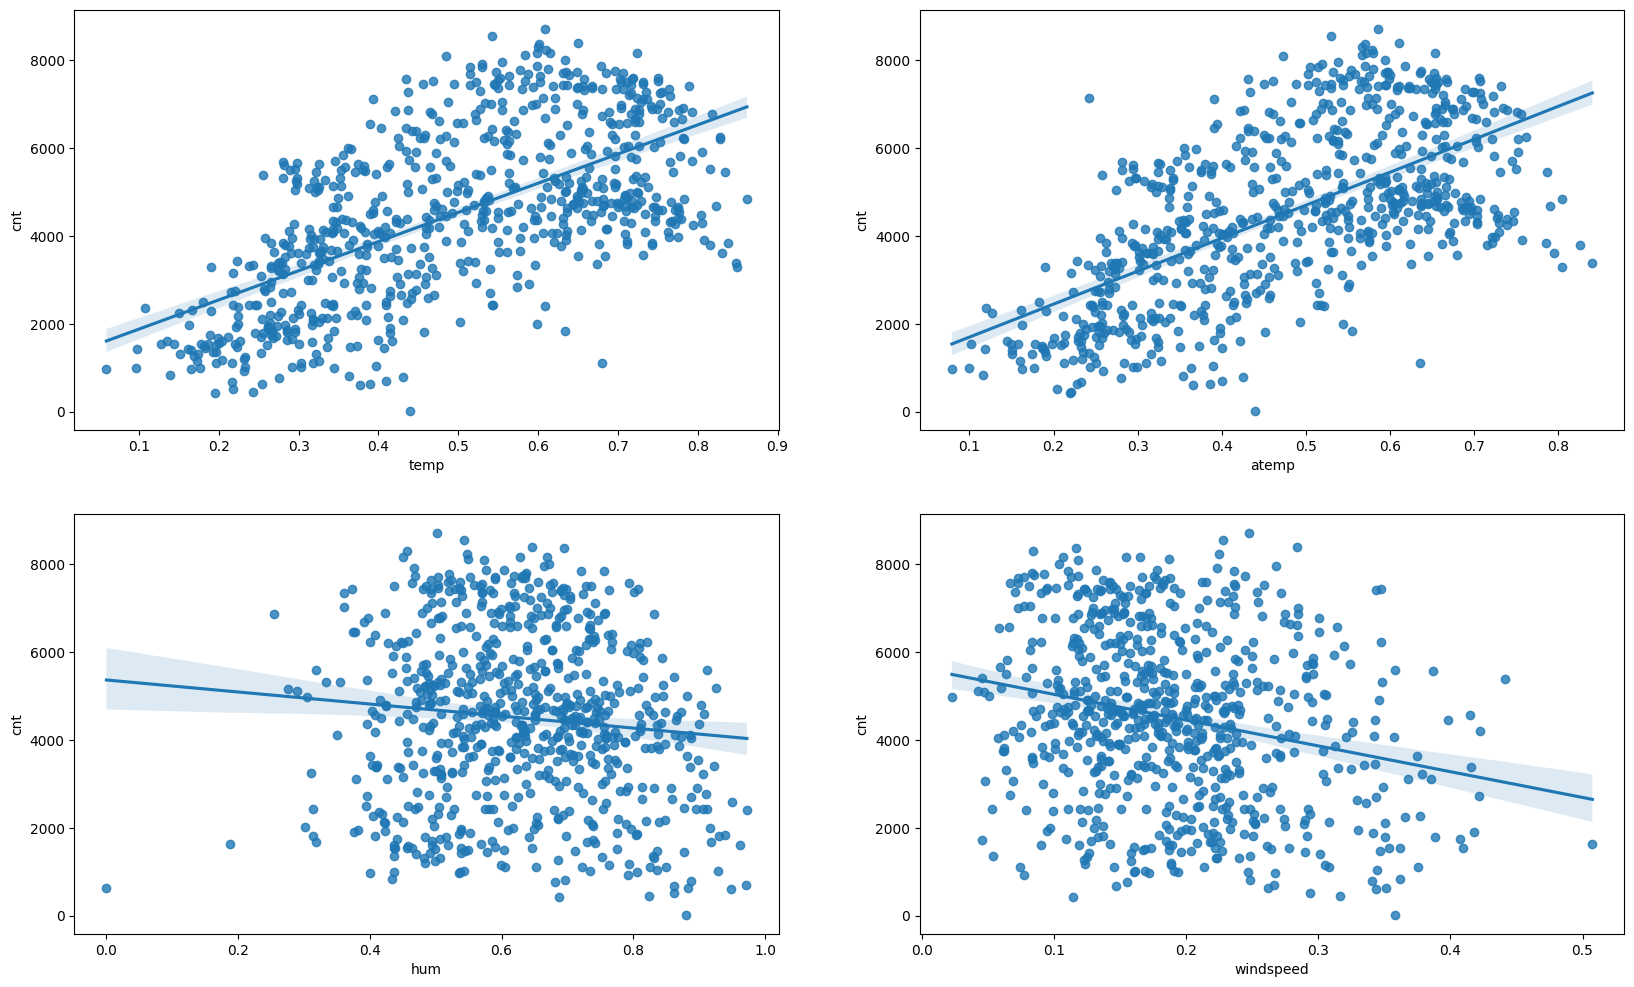

In [ ]:
col= ['temp','atemp','hum','windspeed']
plt.figure(figsize= (20,12))
for i in enumerate(col):
  plt.subplot(2,2,i[0]+1)
  sns.regplot(x=i[1],y='cnt',data=raw_dataset)
plt.show()

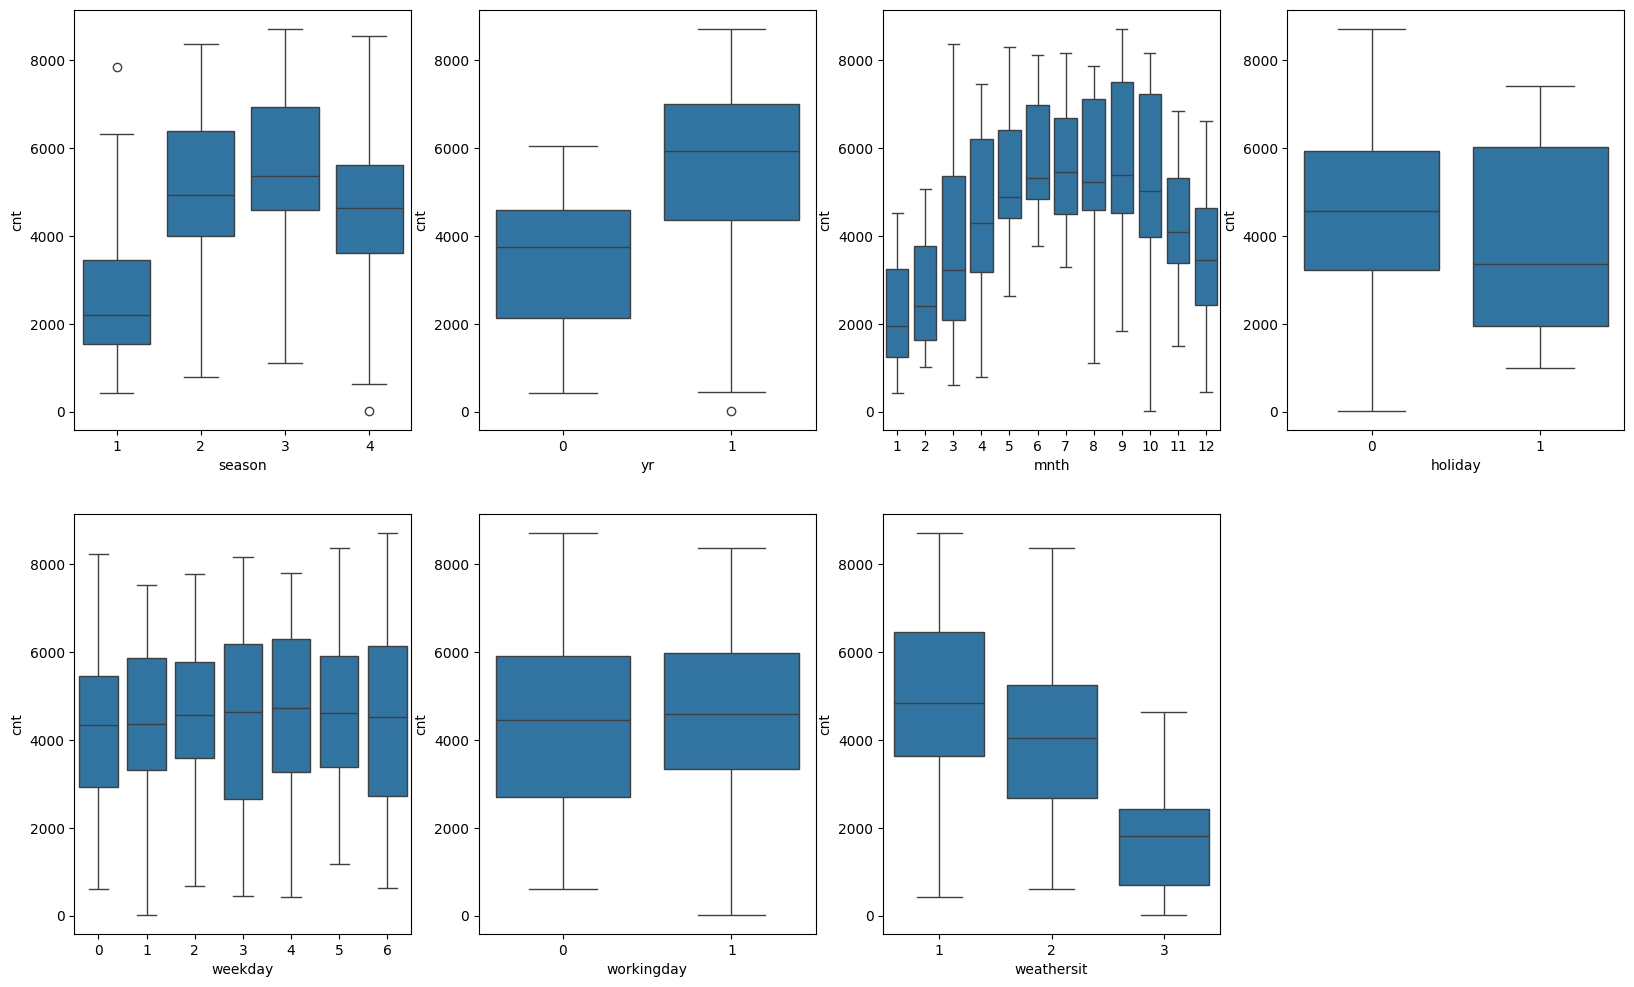

In [ ]:
col= ['season', 'yr', 'mnth', 'holiday','weekday','workingday','weathersit']
plt.figure(figsize= (20,12))
for i in enumerate(col):
  plt.subplot(2,4,i[0]+1)
  sns.boxplot(data=raw_dataset,x=i[1],y='cnt')
plt.show()

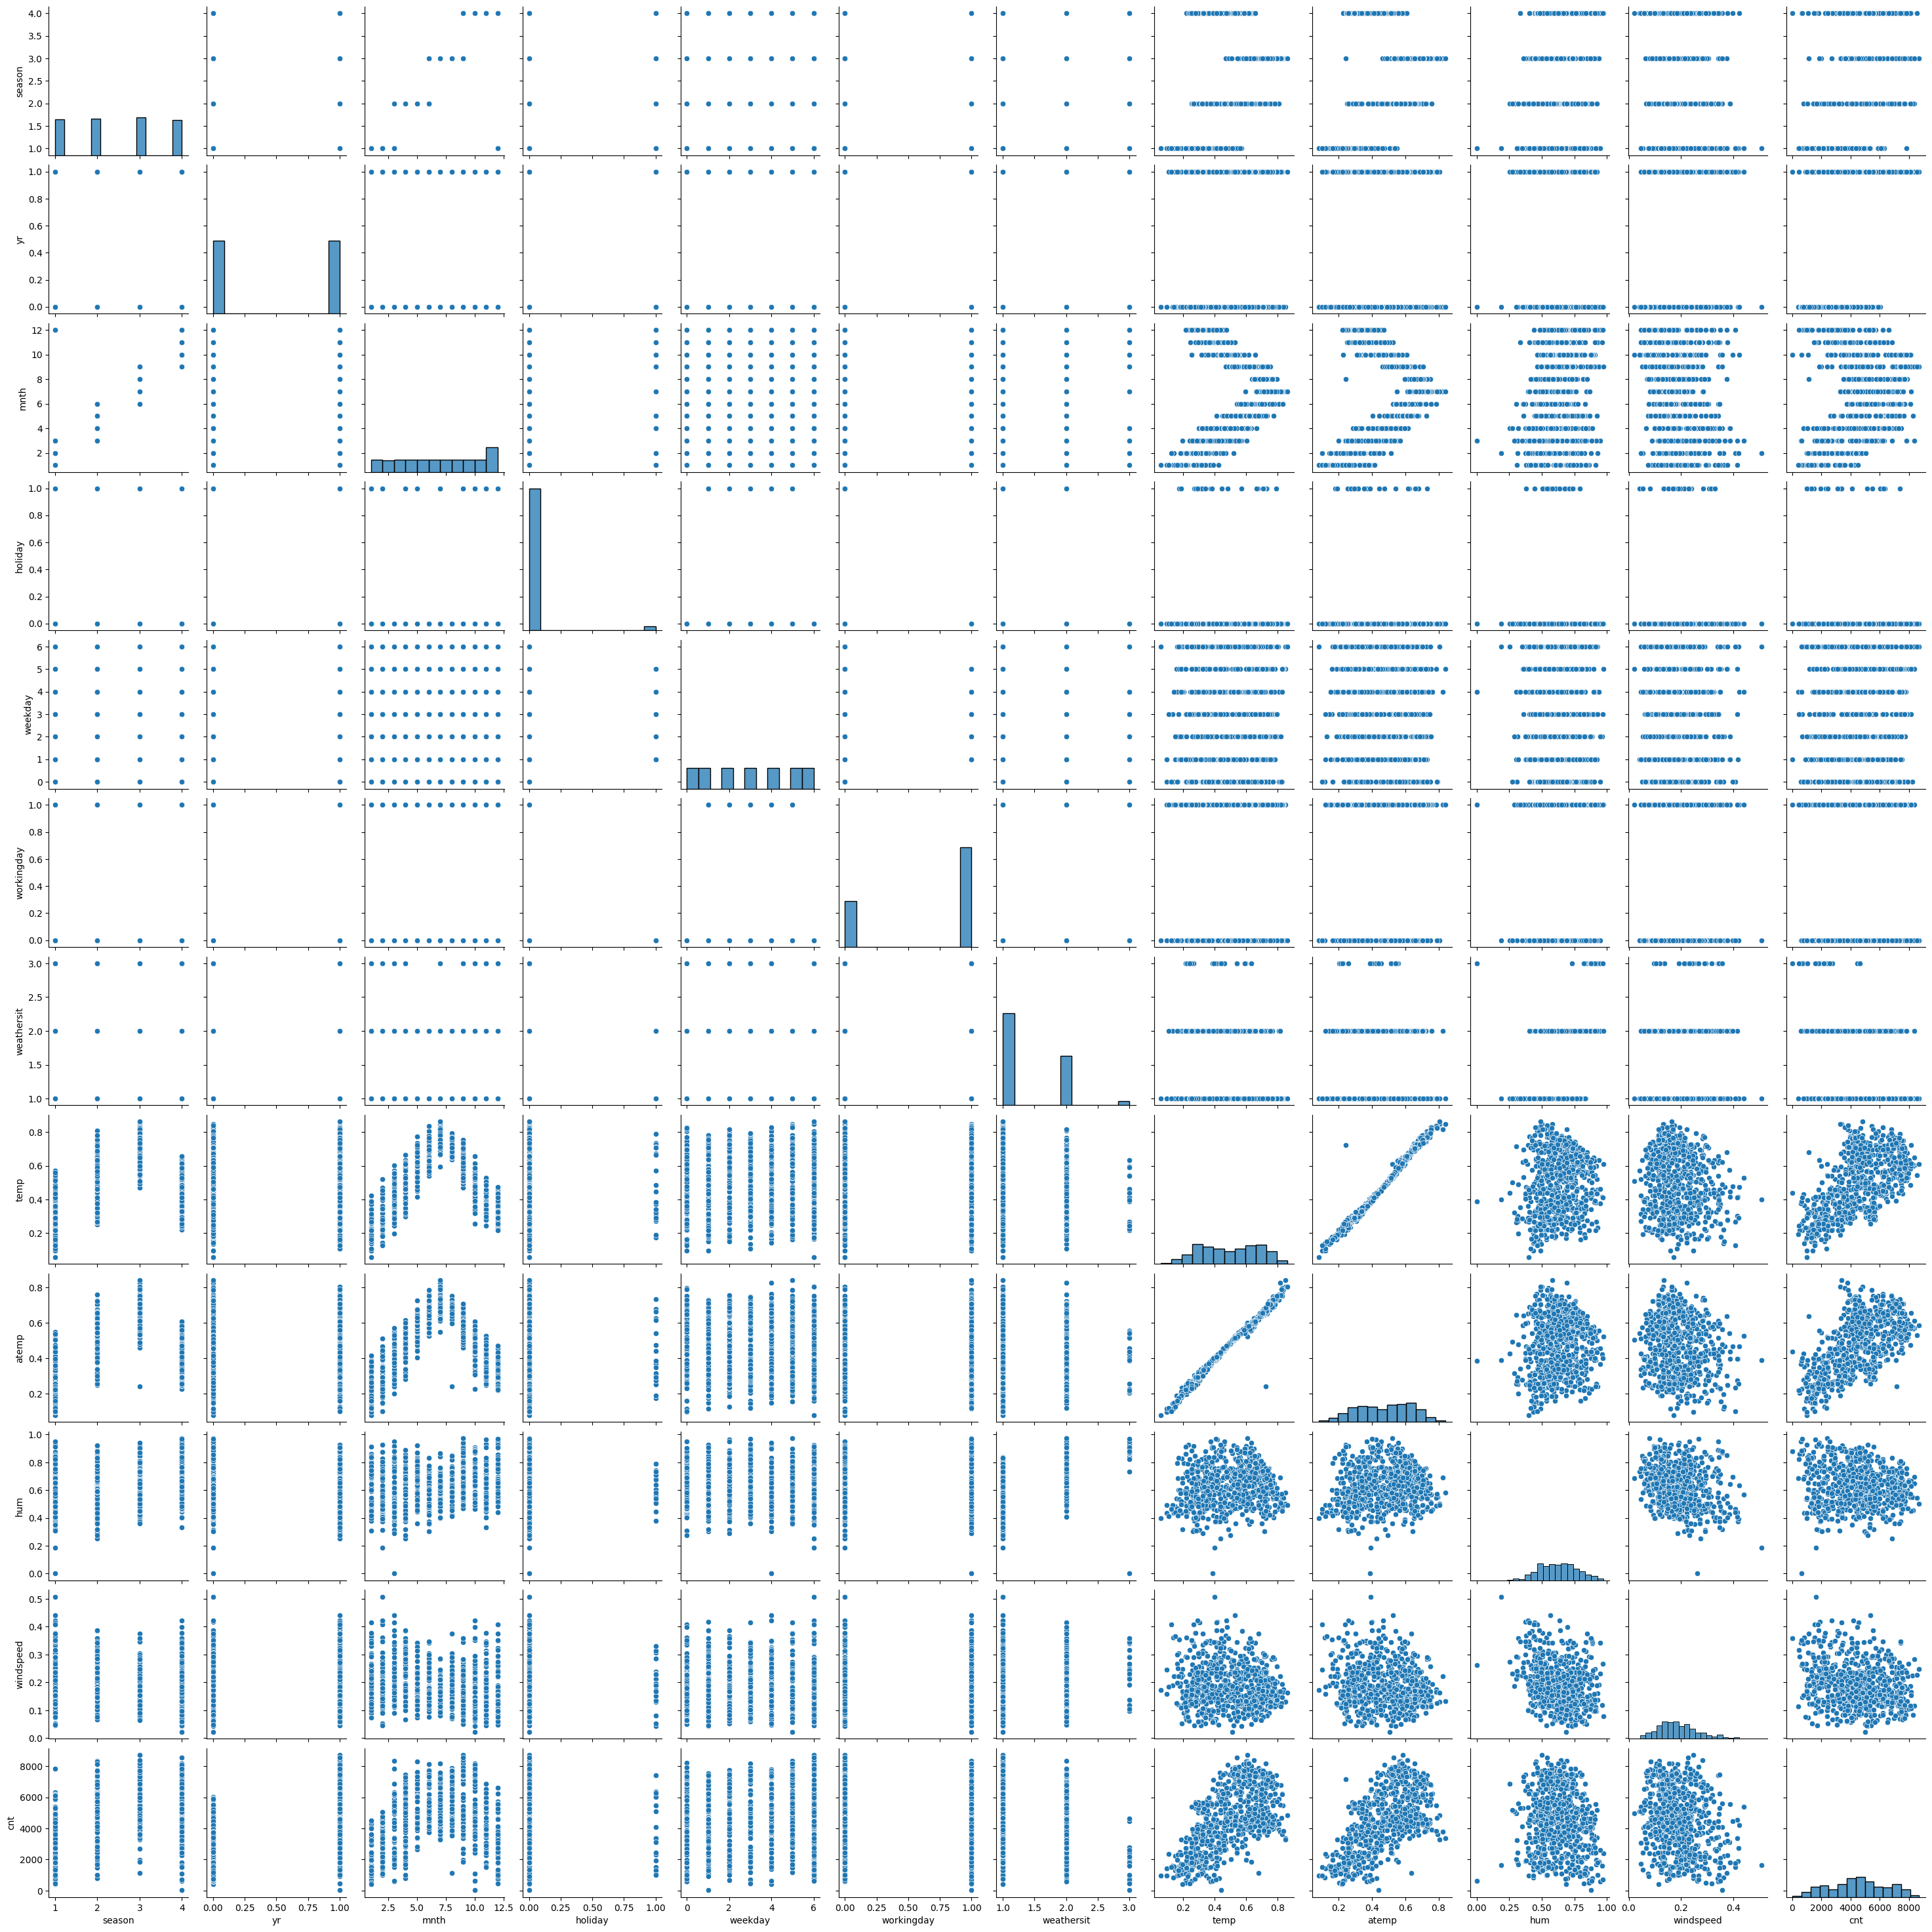

In [ ]:
sns.pairplot(raw_dataset)

<Axes: >

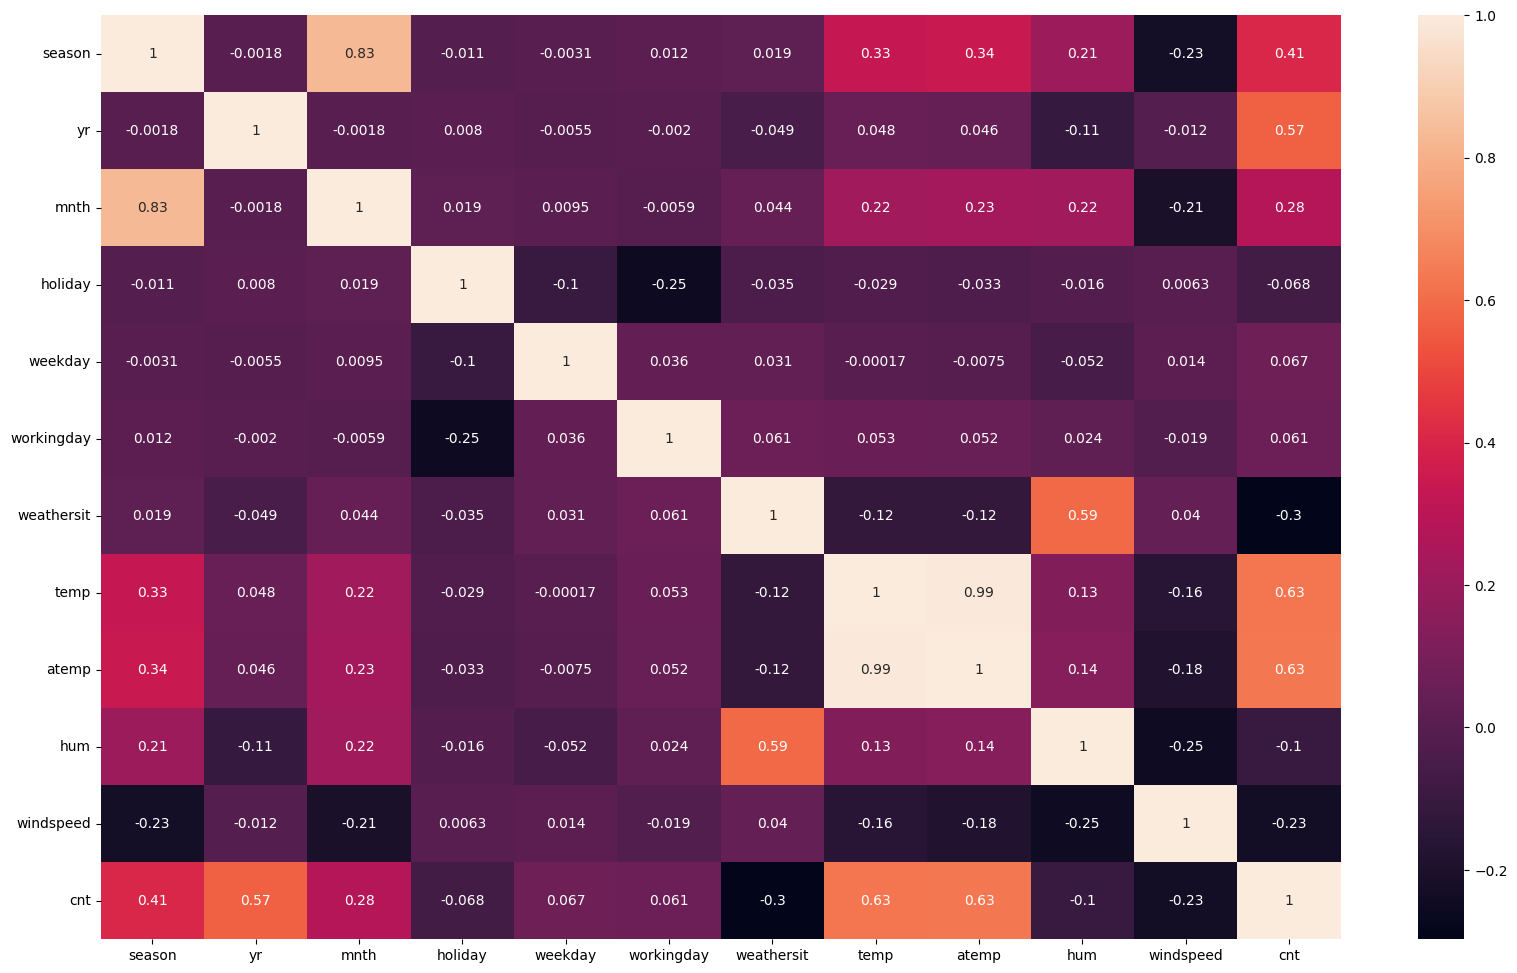

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(raw_dataset.corr(),annot=True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X= raw_dataset.drop(columns=['cnt'],axis=1)
y= raw_dataset['cnt']

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
normalizer= tf.keras.layers.Normalization(axis=-1)

In [ ]:
normalizer.adapt(np.array(X_train))

In [ ]:
print(normalizer.mean.numpy())
print(normalizer.variance.numpy())

[[2.5        0.5171233  6.467466   0.02568493 2.9828768  0.66952056
  1.4023973  0.5001709  0.47854036 0.63118047 0.19068147]]
[[1.21575344e+00 2.49706790e-01 1.17386675e+01 2.50252150e-02
  4.09902191e+00 2.21262783e-01 3.02117527e-01 3.29049565e-02
  2.60920227e-02 2.01770868e-02 5.98200271e-03]]


In [ ]:
print(np.array(X_train[:1]))

[[ 4.        1.       11.        0.        2.        1.        2.
   0.343333  0.323225  0.662917  0.342046]]


In [ ]:
temp = np.array(X_train['temp'])

In [ ]:
temp_normalizer= layers.Normalization(input_shape=[1,],axis=None)
temp_normalizer.adapt(temp)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
temp_model= tf.keras.Sequential(
    [
        temp_normalizer,
        layers.Dense(units=1)

    ]
)
temp_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization)      │ (None, 1)                   │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5 (24.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 3 (16.00 B)

In [ ]:
temp_model.compile(
    optimizer= tf.optimizers.Adam(learning_rate=0.1),
    loss= tf.keras.losses.MeanSquaredError()
)


In [ ]:
histor= temp_model.fit(
    X_train['temp'],
    y_train,
    epochs=100,
    verbose=True,
    validation_split=0.2
)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 24169088.0000 - val_loss: 22503396.0000
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 26204382.0000 - val_loss: 22488222.0000
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 24046772.0000 - val_loss: 22473454.0000
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 25326188.0000 - val_loss: 22458480.0000
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 25531496.0000 - val_loss: 22443506.0000
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 25093074.0000 - val_loss: 22428714.0000
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24434780.0000 - val_loss: 22413760.0000
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24767274.0000 - val_loss: 22398836.0000
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 25346698.0000 - val_loss: 22384038.0000
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 24883518.0000 - val_loss: 22369296.0000
Epoch 11

In [ ]:
print(histor.history['loss'])

[24951854.0, 24935216.0, 24917728.0, 24900848.0, 24883782.0, 24866582.0, 24849766.0, 24832862.0, 24815732.0, 24798688.0, 24781866.0, 24764766.0, 24747650.0, 24730860.0, 24713554.0, 24696992.0, 24679878.0, 24662952.0, 24646082.0, 24628920.0, 24611998.0, 24594980.0, 24578066.0, 24561250.0, 24544410.0, 24527524.0, 24510912.0, 24494044.0, 24477326.0, 24460410.0, 24443898.0, 24427002.0, 24410130.0, 24393678.0, 24376846.0, 24359914.0, 24343220.0, 24326464.0, 24310066.0, 24292888.0, 24276200.0, 24259466.0, 24242724.0, 24226218.0, 24209402.0, 24192614.0, 24176012.0, 24159352.0, 24142664.0, 24126158.0, 24109344.0, 24092860.0, 24076142.0, 24059618.0, 24043014.0, 24026188.0, 24009796.0, 23993300.0, 23976704.0, 23960346.0, 23943698.0, 23927112.0, 23910938.0, 23894090.0, 23877708.0, 23861332.0, 23844588.0, 23828404.0, 23811782.0, 23795206.0, 23778734.0, 23762354.0, 23745948.0, 23729588.0, 23713056.0, 23696894.0, 23680646.0, 23664108.0, 23647906.0, 23631718.0, 23615308.0, 23598948.0, 23582814.0, 235

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'],label='LOSS')
  plt.plot(history.history['val_loss'],label='VALIDATION_LOSS')
  plt.legend()
  plt.grid(True)

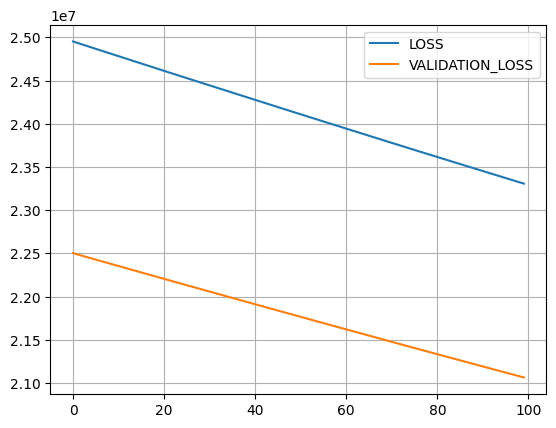

In [ ]:
plot_loss(histor)

In [ ]:
linear_model= tf.keras.Sequential(
    [
        normalizer,
        layers.Dense(14)
    ]
)
linear_model.add(layers.Dense(100))
linear_model.summary()


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (None, 11)                  │              23 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23 (96.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23 (96.00 B)

In [ ]:
linear_model.compile(
    optimizer= tf.optimizers.Adam(learning_rate=0.01),
    loss= 'mean_squared_error'

)

In [ ]:
history= linear_model.fit(
    X_train,
    y_train,
    epochs=200,
    verbose=True,
    validation_split = 0.2
)

Epoch 1/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 25706874.0000 - val_loss: 22512728.0000
Epoch 2/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 25209304.0000 - val_loss: 22499462.0000
Epoch 3/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 25209474.0000 - val_loss: 22471376.0000
Epoch 4/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 26173096.0000 - val_loss: 22423520.0000
Epoch 5/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 24525298.0000 - val_loss: 22354714.0000
Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 24294104.0000 - val_loss: 22261876.0000
Epoch 7/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23860646.0000 - val_loss: 22150842.0000
Epoch 8/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 25044918.0000 - val_loss: 22015038.0000
Epoch 9/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 24706992.0000 - val_loss: 21863170.0000
Epoch 10/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 24297044.0000 - val_loss: 21695886.0000
Epoch 1

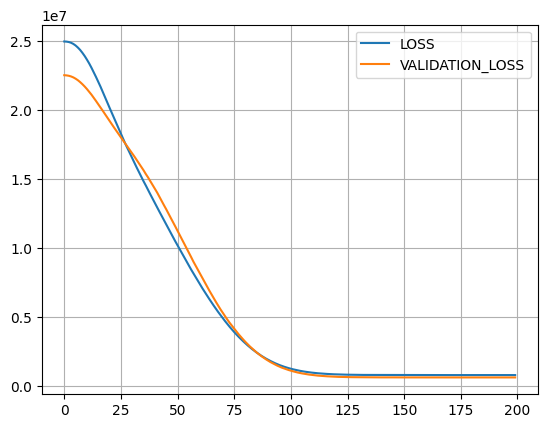

In [ ]:
plot_loss(history)